In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_breast_cancer, fetch_california_housing, load_diabetes
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from scipy.stats import spearmanr, pearsonr

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.cm as cm

from sklearn.manifold import TSNE



In [3]:
%config InlineBackend.figure_format='retina'



In [4]:
path_arakawa = "C:/Users/46705/Documents/SpiderSilk/data/post_filtering/arakawa_ara.csv"

path_anno = "C:/Users/46705/Documents/SpiderSilk/data/annotations/annotation.csv"

arakawa = pd.read_csv(path_arakawa, sep= ",")

In [5]:

# df = pd.concat([df.iloc[:4], df[df["Family"] == "Araneidae"]])
# df.to_csv("C:/Users/46705/Documents/SpiderSilk/data/post_filtering/gland_araneidae.csv", index=False)

In [6]:
arakawa

,Orthogroup,ID,idv_id,DRR,species_x,Genus,Family,MaSp1,MaSp2,MaSp2B,...,ten_percent_weightloss,crystallinity,birefringence,birefringence_sd,diameter,diameter_sd,water_content,supercontraction,supercontraction_sd,Cluster
0,Group,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,geneName,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,product,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1345-W1_S7,1345.0,DRR296993,sia,Yaginumia,Araneidae,16.953292,14.133827,7.721099,...,NaN,15.0,65.0,10.3,1.19,0.08,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,282,7416-W1_S13,7416.0,DRR168635,-,Cyrtophora,Araneidae,15.090726,11.542120,6.942515,...,317.0,28.0,54.3,2.7,2.49,0.06,3.6,NaN,NaN,0.0
132,283,7421-W1_S15,7421.0,DRR168623,extrusa,Caerostris,Araneidae,18.803023,18.702736,16.331774,...,NaN,23.0,45.3,2.1,1.45,0.04,NaN,35.2,11.1,3.0
133,284,7426-W1_S6,7426.0,DRR168628,-,Acrosomoides,Araneidae,13.888147,15.791845,13.047343,...,NaN,25.0,33.6,2.0,2.23,0.04,NaN,39.3,5.3,5.0
134,285,7439-W1_S16,7439.0,DRR168624,darwini,Caerostris,Araneidae,19.427562,18.428777,17.108083,...,290.0,31.0,42.5,1.2,3.44,0.03,7.1,43.9,4.4,3.0


### Arakawa Data


In [7]:
df = arakawa


In [8]:
data = df.iloc[4:, 7:-29].apply(pd.to_numeric, errors='coerce').fillna(0)
mech_prop = ['toughness',"young's_modulus", 'tensile_strength', 'strain_at_break']


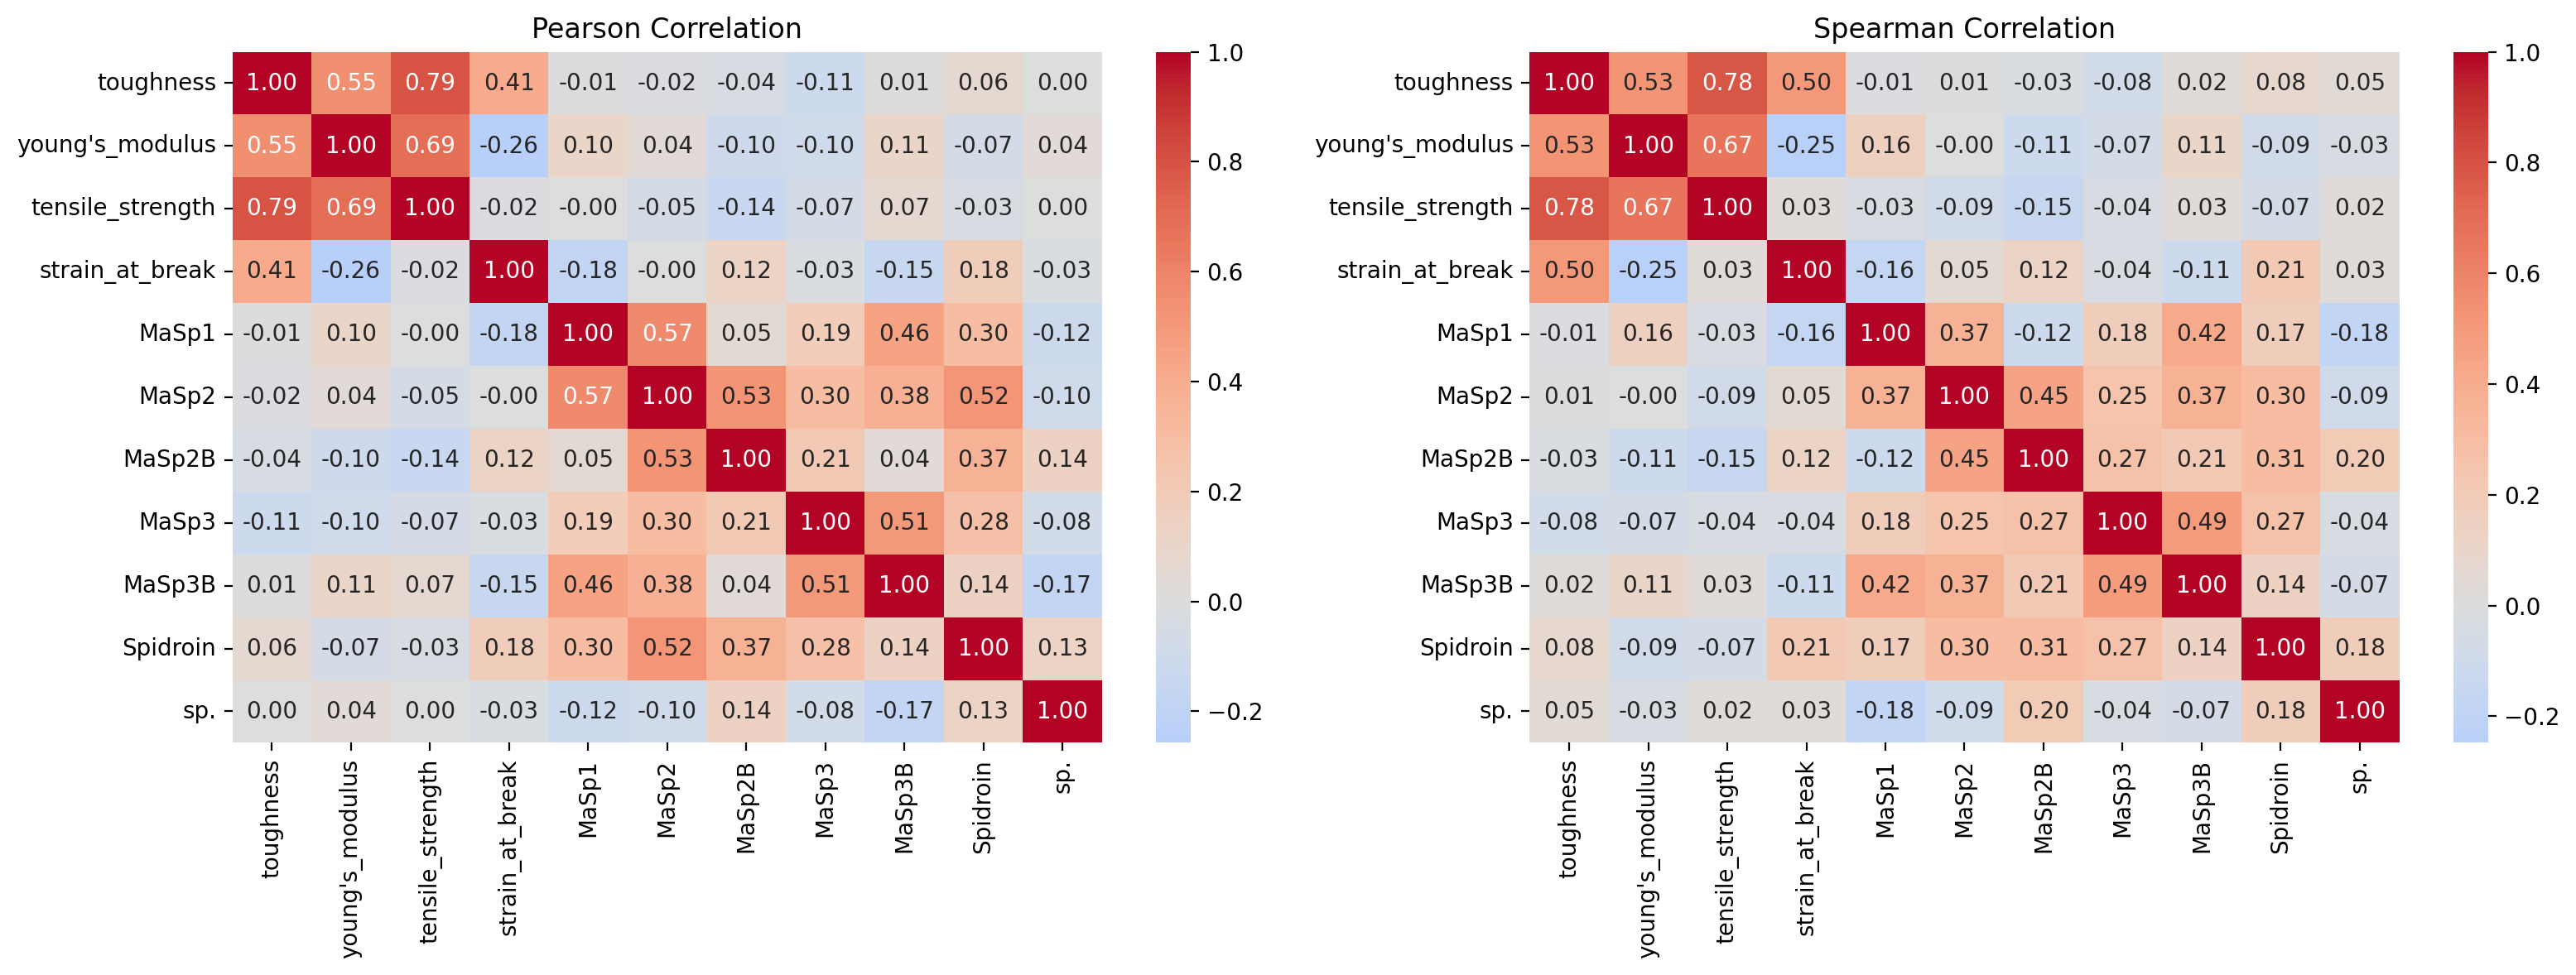

In [9]:
# Heantmaps arakawa correlations

conc= pd.concat([df[mech_prop], data], axis = 1)
pearson_corr = conc.corr(method='pearson')
spearman_corr = conc.corr(method='spearman')


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0], center= 0, )
axes[0].set_title('Pearson Correlation')
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1], center= 0)
axes[1].set_title('Spearman Correlation')

plt.tight_layout()
plt.show()


[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 132 samples in 0.009s...
[t-SNE] Computed neighbors for 132 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 132 / 132
[t-SNE] Mean sigma: 0.913866
[t-SNE] KL divergence after 250 iterations with early exaggeration: 121.784630
[t-SNE] KL divergence after 1000 iterations: 0.470252


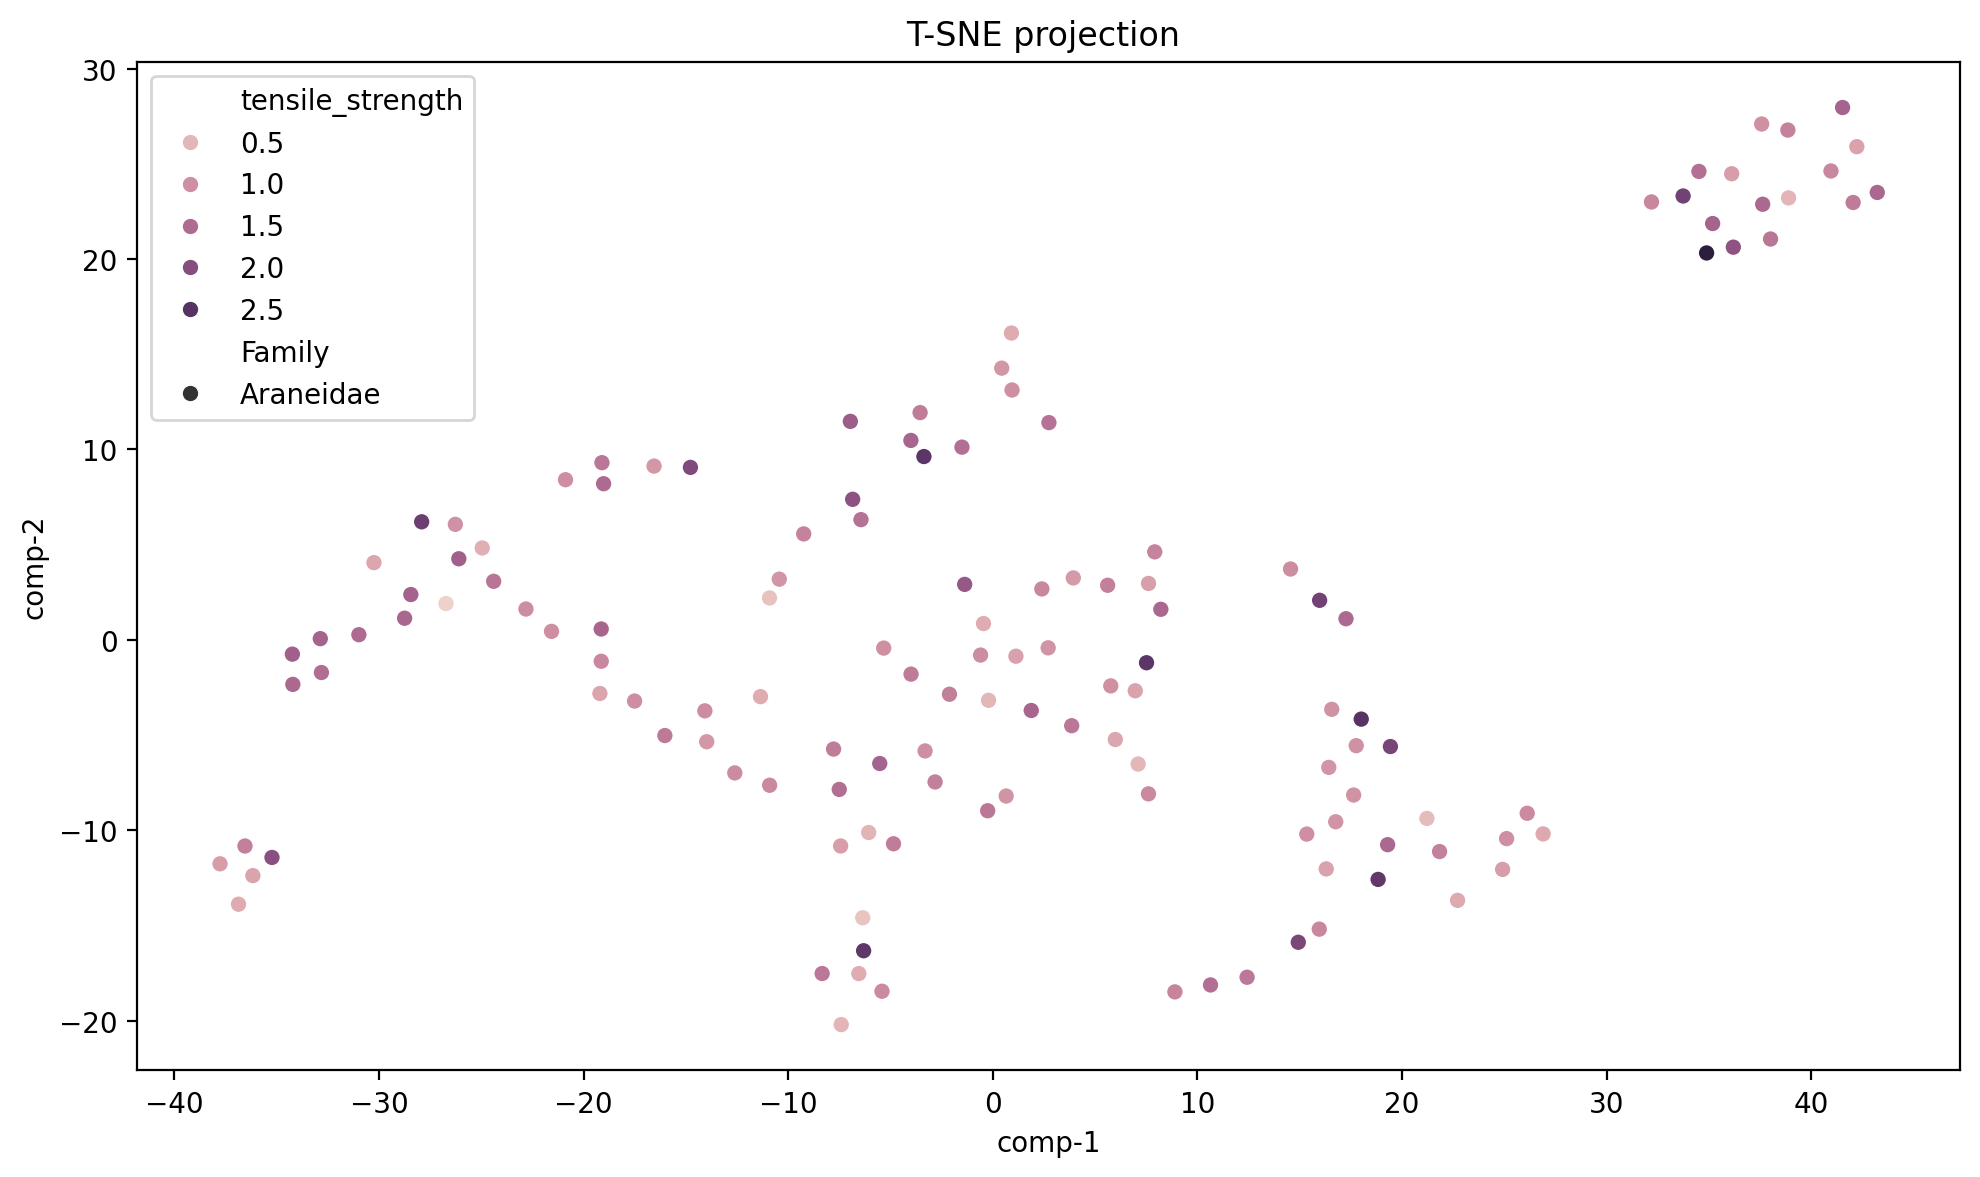

In [10]:

tsne = TSNE(n_components=2, early_exaggeration = 20.0, perplexity = 10, verbose=1, random_state=123)
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)
z = tsne.fit_transform(standardized_data) 
df_tsne = df.iloc[4:, :].copy()
df_tsne["comp-1"] = z[:,0]
df_tsne["comp-2"] = z[:,1]


plt.figure(figsize=(10, 6))

sns.scatterplot(x="comp-1", y="comp-2", data=df_tsne, hue= "tensile_strength", style="Family")
plt.title(f"T-SNE projection ")


plt.tight_layout()
plt.show()



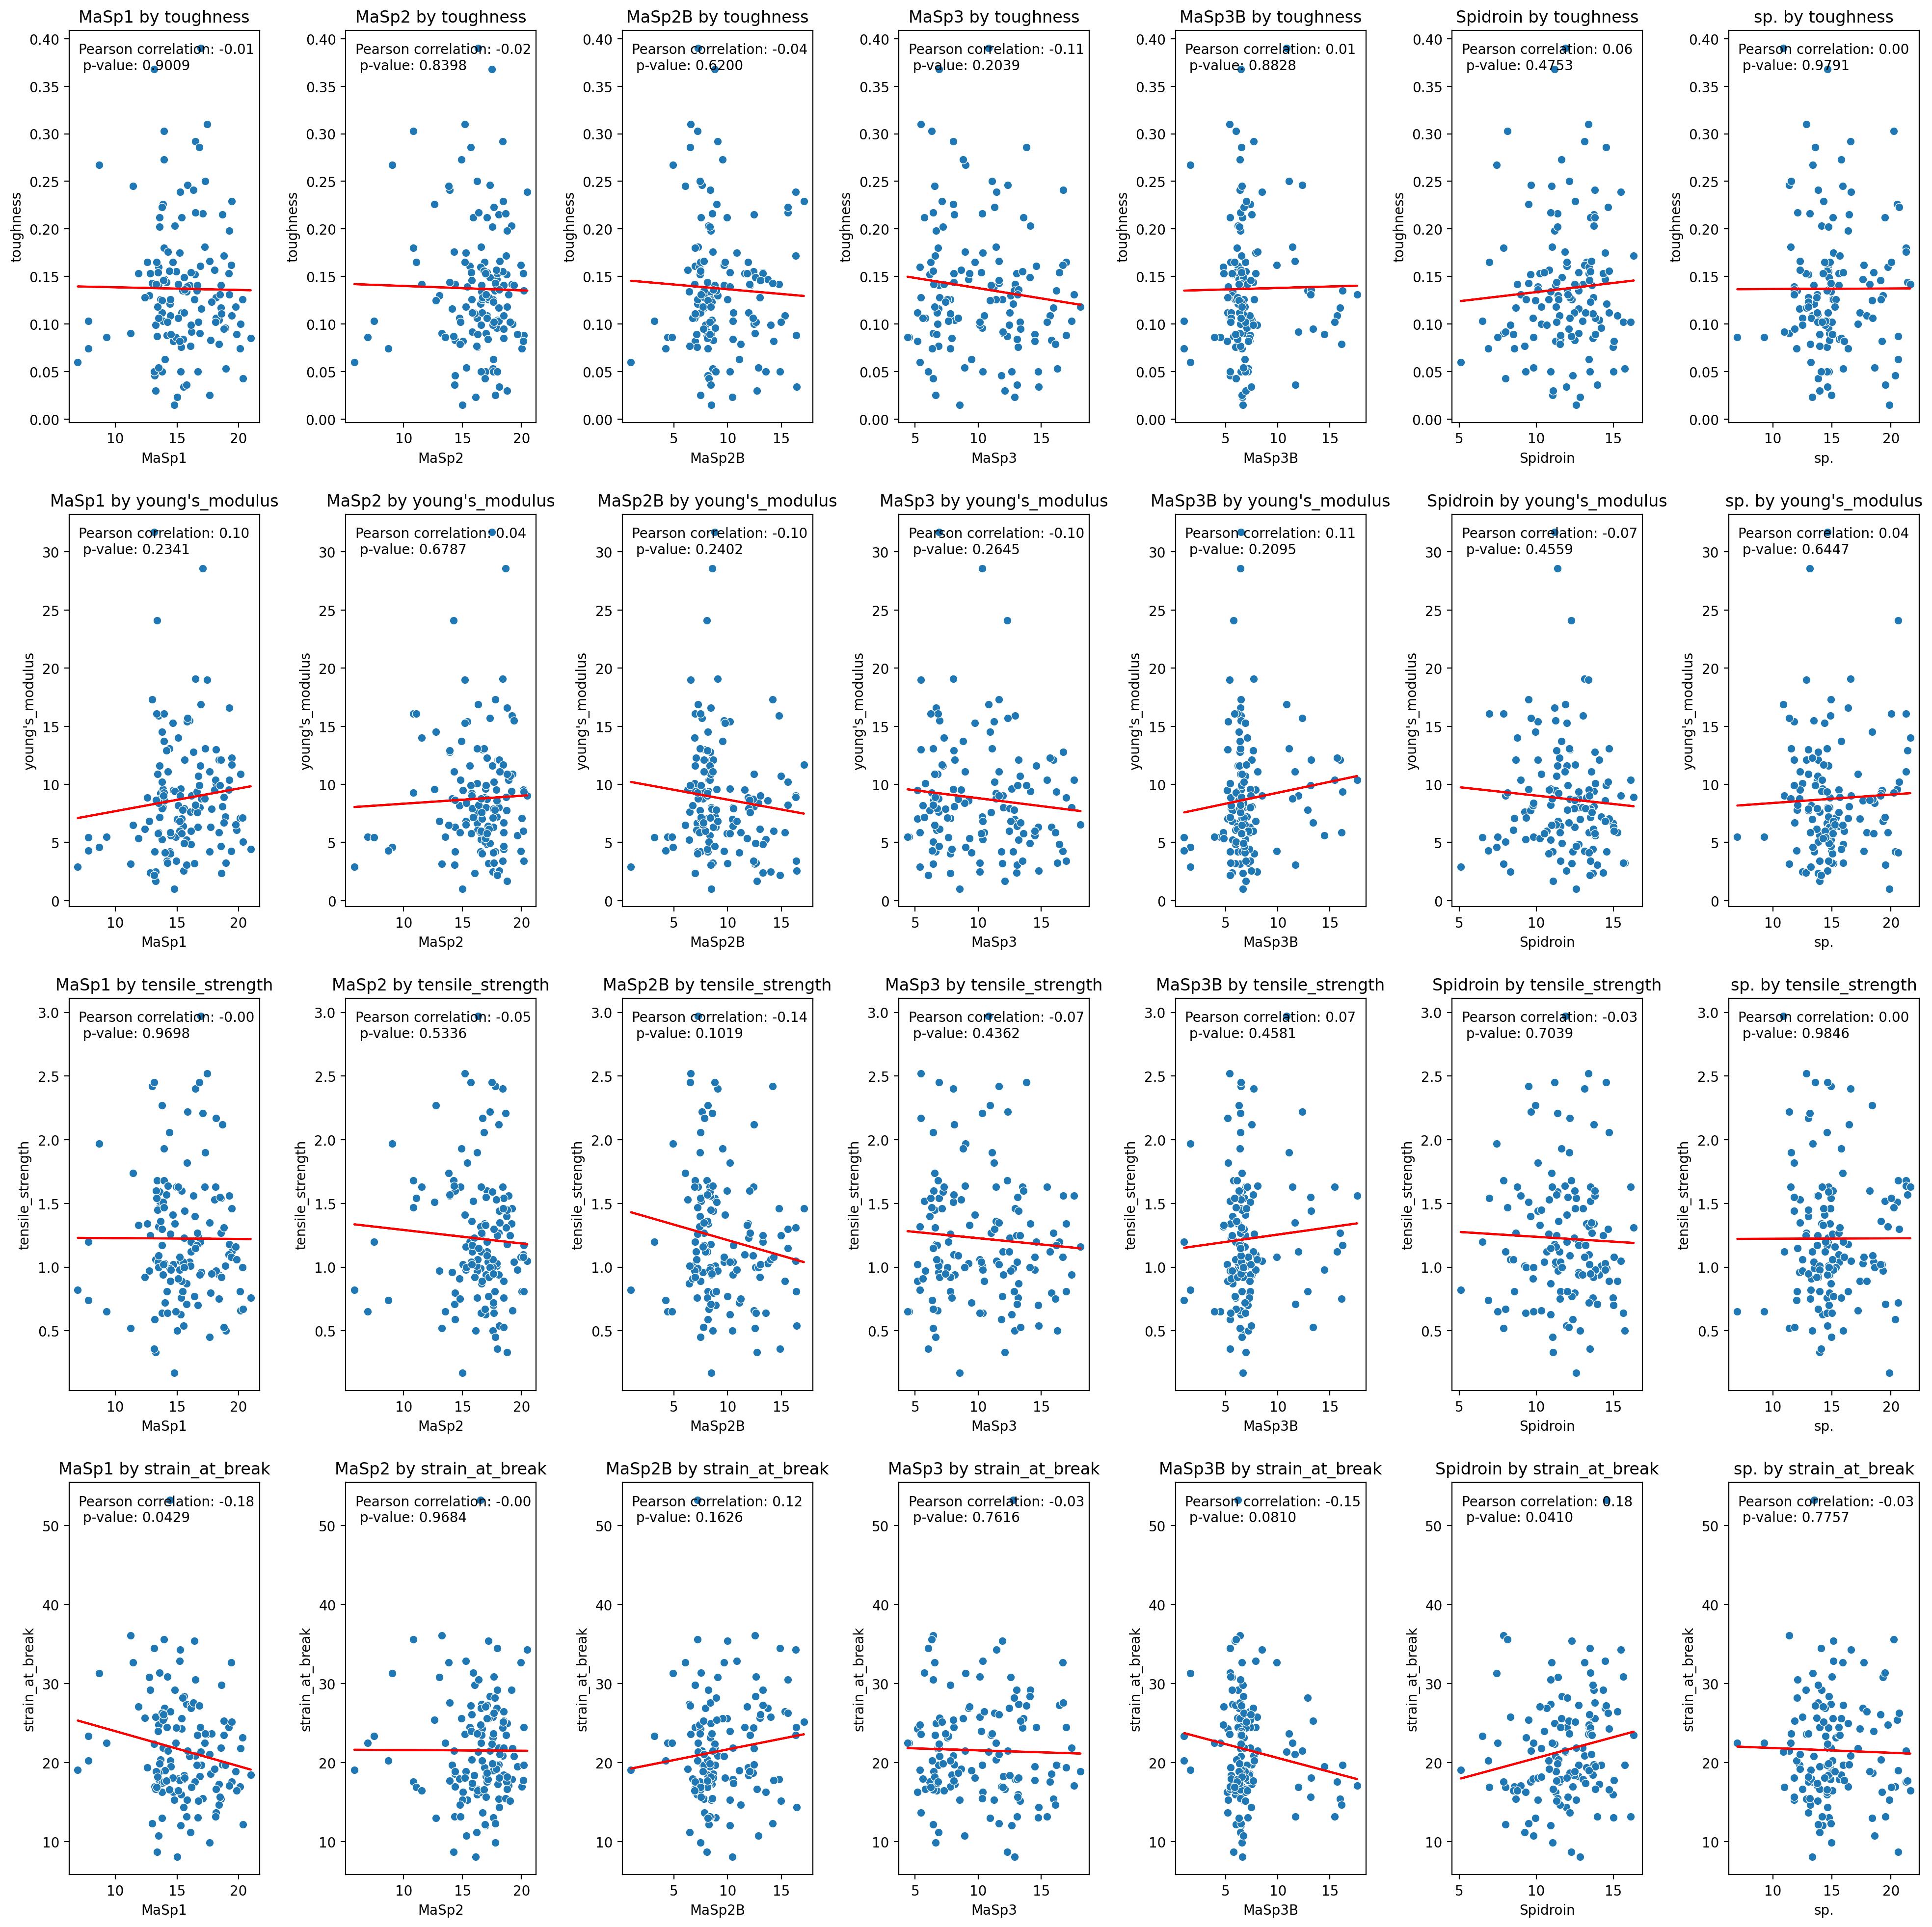

In [11]:
df_filtered_PC = df.iloc[4:, :]

fig, axes = plt.subplots(nrows=len(mech_prop), ncols=7, figsize=(20, 5 * len(mech_prop)))

for j, prop in enumerate(mech_prop):
    for i, pc in enumerate(['MaSp1', 'MaSp2', 'MaSp2B', 'MaSp3', 'MaSp3B', 'Spidroin', 'sp.']):
        correlation_coefficient, p_value = pearsonr(df_filtered_PC[pc], df_filtered_PC[prop])

        sns.scatterplot(x=pc, y=prop, data=df_filtered_PC,  ax=axes[j, i])
        axes[j, i].set_ylabel(prop)
        axes[j, i].set_xlabel(f"{pc}")
        axes[j, i].set_title(f'{pc} by {prop}')

        slope, intercept = np.polyfit(df_filtered_PC[pc], df_filtered_PC[prop], 1)
        axes[j, i].plot(df_filtered_PC[pc], slope * df_filtered_PC[pc] + intercept, color='red')
        axes[j, i].text(0.05, 0.9, f"Pearson correlation: {correlation_coefficient:.2f}\n p-value: {p_value:.4f}", 
                        fontsize=10, transform=axes[j, i].transAxes)

plt.tight_layout(pad=2.0)
plt.show()

